# 911 Calls - Full

For this capstone project we will be analyzing some 911 call data. The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

<b>INCLUDED</b> : Data Subset

<b>Full Dataset</b> : https://www.kaggle.com/mchirico/montcoalert   (Emergency - 911 Calls)

<font color='red'><b>IMPORTANT NOTE</b></font> : Project includes Interactive Plots as well, which may not be visible directly on GitHub.<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;
Kindly download and run the Jupyter notebook with the required python modules installed.


<b>Visualization Libraries Used</b>:

1. MatplotLib
2. Seaborn
3. Plotly (offline) and Cufflinks
    - Requires you to run the Jupyter notebook on your computer with plotly and cufflink modules installed


<b>Module install commands</b>:

- pip install matplotlib
- pip install seaborn
- pip install plotly
- pip install chart-studio.plotly
- pip install cufflinks

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('911_data.csv')

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 295.5 MB


In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Questions
___

<big>1. What are the top 10 <code>zip codes</code> with <b>highest</b> number of 911 calls?</big>

In [4]:
df['zip'].value_counts().head(10)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
19002.0    21070
19468.0    18939
19046.0    17886
19454.0    17661
19090.0    17377
Name: zip, dtype: int64

<big>2. What are the top 10 <code>townships (twp)</code> with <b>highest</b> number of 911 calls?</big>

In [5]:
df['twp'].value_counts().head(10)

LOWER MERION        55490
ABINGTON            39947
NORRISTOWN          37633
UPPER MERION        36010
CHELTENHAM          30574
POTTSTOWN           27387
UPPER MORELAND      22932
LOWER PROVIDENCE    22476
PLYMOUTH            20116
UPPER DUBLIN        18862
Name: twp, dtype: int64

<big>3. How many unique codes are there in the <code>title</code> column?</big>

In [6]:
df['title'].nunique()

148

<big>4. Address (<code>addr</code>) with the most 911 calls?</big>

In [7]:
print(df['addr'].value_counts().idxmax(), df['addr'].value_counts().max(), sep=" : ")

SHANNONDELL DR & SHANNONDELL BLVD : 7285


<big>5. What are the top 5 most reported emergencies (<code>title</code> column)?</big>

In [8]:
df['title'].value_counts().head()

Traffic: VEHICLE ACCIDENT -    148372
Traffic: DISABLED VEHICLE -     47909
Fire: FIRE ALARM                38336
EMS: FALL VICTIM                34676
EMS: RESPIRATORY EMERGENCY      34248
Name: title, dtype: int64

<big>6. What are the top 5 <code>townships (twp)</code> with most reported <b>'Traffic: VEHICLE ACCIDENT -'</b> emergency?</big>

In [9]:
filter_ = df['title'] == 'Traffic: VEHICLE ACCIDENT -'

df[filter_]['twp'].value_counts().head()

LOWER MERION    14613
UPPER MERION    11961
ABINGTON         8354
CHELTENHAM       7823
PLYMOUTH         5962
Name: twp, dtype: int64

<big>7. What are the top 5 townships (<code>twp</code>) reporting the most number of '<b>EMS: RESPIRATORY</b>' emergecy in 2020?<br>(potential COVID contamination)</big>

In [10]:
filter_1 = df['timeStamp'].apply(lambda x : x.startswith('2020'))

filter_2 = df['title'] == 'EMS: RESPIRATORY EMERGENCY'

df[filter_1 & filter_2]['twp'].value_counts().head()

NORRISTOWN      431
ABINGTON        303
POTTSTOWN       275
SPRINGFIELD     236
LOWER MERION    206
Name: twp, dtype: int64

### Creating New Column - <code>reason</code>

In [11]:
df['reason'] = df['title'].apply(lambda x : x.split(':')[0])

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


<big>8. What are the top 5 most reported <b>EMS</b> emergencies (<code>title</code> column)?</big>

In [12]:
df[df['reason'] == 'EMS']['title'].value_counts().head()

EMS: FALL VICTIM              34676
EMS: RESPIRATORY EMERGENCY    34248
EMS: CARDIAC EMERGENCY        32332
EMS: VEHICLE ACCIDENT         25513
EMS: SUBJECT IN PAIN          19646
Name: title, dtype: int64

<big>9. Which areas (<code>addr</code>) reported the most '<b>Fire</b>' incidents on 911?</big>

In [13]:
df[df['reason'] == 'Fire']['addr'].value_counts().head(6)

MORELAND RD & EASTON RD    359
KING ST & PENN ST          344
HIGH ST & S FRANKLIN ST    274
WALNUT ST & S 4TH AVE      261
GULPH RD & KIRK AVE        220
MAIN ST                    216
Name: addr, dtype: int64

<big>10. What is the most common <b>reason</b> for 911 calls?</big>

In [14]:
df['reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

## Data Visualization
___

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn')

In [16]:
import seaborn as sns

sns.set_theme()

sns.set_context('talk')


<AxesSubplot:xlabel='reason', ylabel='count'>

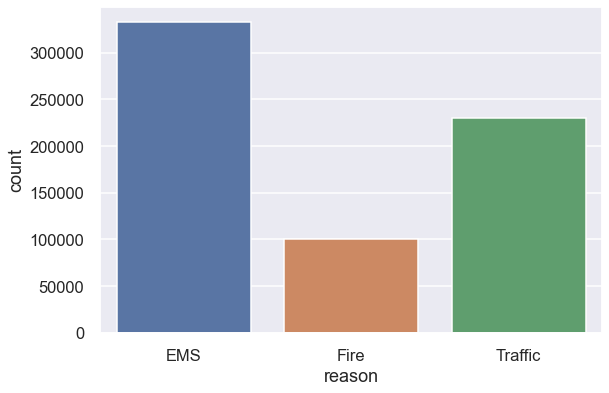

In [17]:
plt.figure(figsize=(9,6))

sns.countplot(data=df, x='reason')

In [18]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import cufflinks as cfl

cfl.go_offline()

In [19]:
df['reason'].value_counts().iplot(kind='bar',title='Call Count by Reason')

### Time Information

In [20]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [21]:
type(df['timeStamp'].iloc[0])

str

In [22]:
# Converting to Datetime

df['timeStamp'] = pd.to_datetime(df['timeStamp'])

type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

### Creating New Columns - <code>Month</code>, <code>Day of Week</code>, <code>Hour</code>

In [23]:
day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}


df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['day_of_week'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)

df['day_of_week'] = df['day_of_week'].map(day_map)

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,month,day_of_week,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,Thu,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,Thu,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,12,Thu,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,Thu,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,Thu,16


### Analyzing Calls by Day of Week

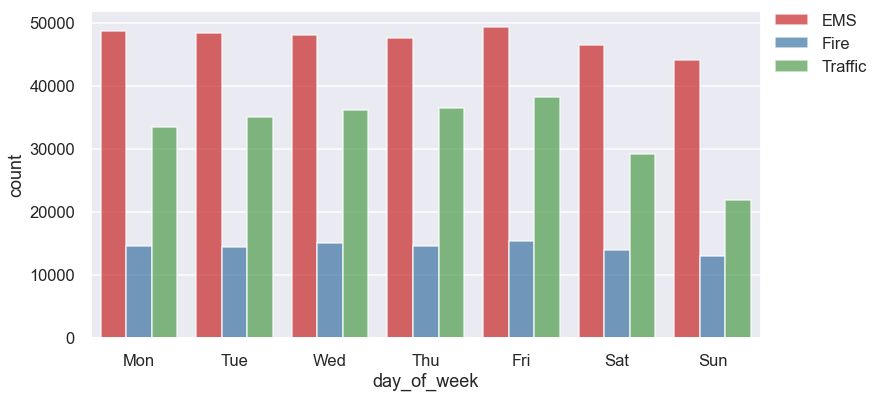

In [24]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='day_of_week', hue='reason',
              palette='Set1', alpha=0.75,
              order=day_map.values()).legend(loc='center left',
                                             bbox_to_anchor=(1.0, 0.9))


In [25]:
# Grouping DataFrame over 'day_of_week' and 'reason'
calls_by_day_of_week = df.groupby(['day_of_week', 'reason'])[['e']].sum()

# Re-ordering Index of the Data Set
calls_by_day_of_week = calls_by_day_of_week.reindex(day_map.values(), level=0)

calls_by_day_of_week.head()

e
day_of_week reason        
Mon         EMS      48750
            Fire     14499
            Traffic  33496
Tue         EMS      48371
            Fire     14311

In [26]:
plt.style.use('ggplot')
sns.set_context('talk')


Text(0.5, 1.0, 'Total Call Count by Day of Week')

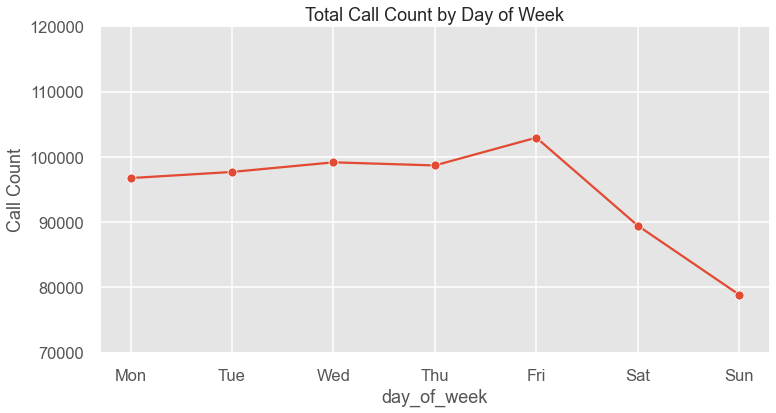

In [27]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=calls_by_day_of_week, x='day_of_week', y='e',
             marker='o', estimator=sum, ci=None)

plt.ylabel('Call Count')
plt.ylim((70000,120000))
plt.title("Total Call Count by Day of Week")

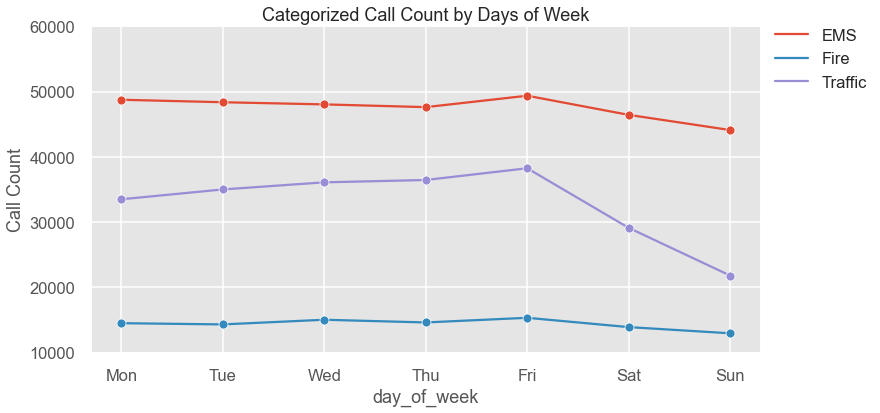

In [28]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=calls_by_day_of_week, x='day_of_week', y='e',
             hue='reason', marker='o')


plt.ylabel('Call Count')
plt.ylim((10000,60000))
plt.title("Categorized Call Count by Days of Week")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.9))

### Analyzing Calls by Month

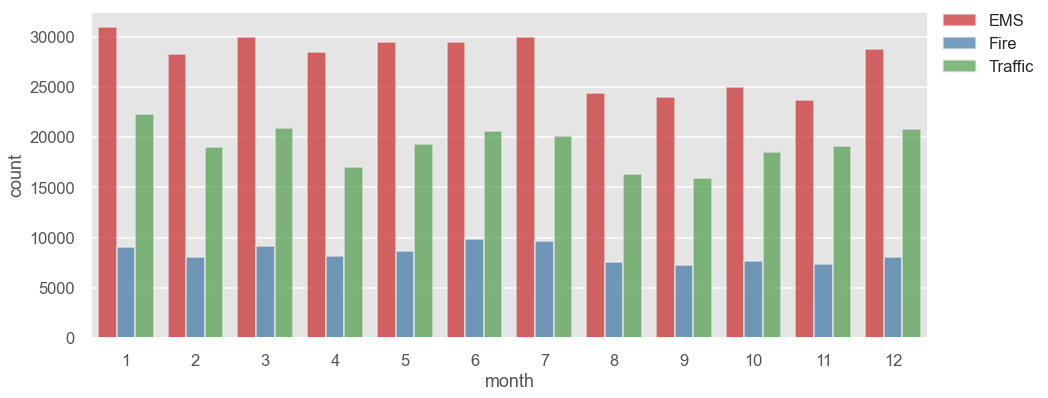

In [29]:
plt.figure(figsize=(15, 6))

sns.countplot(data=df, x='month', hue='reason',
              palette='Set1', alpha=0.75)

plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.9))


In [30]:
# Grouping DataFrame over 'day_of_week' and 'reason'
calls_by_month = df.groupby(['month', 'reason'])[['e']].sum()

calls_by_month.head()

e
month reason        
1     EMS      30970
      Fire      9087
      Traffic  22279
2     EMS      28329
      Fire      8092

Text(0.5, 1.0, 'Total Call Count by Month')

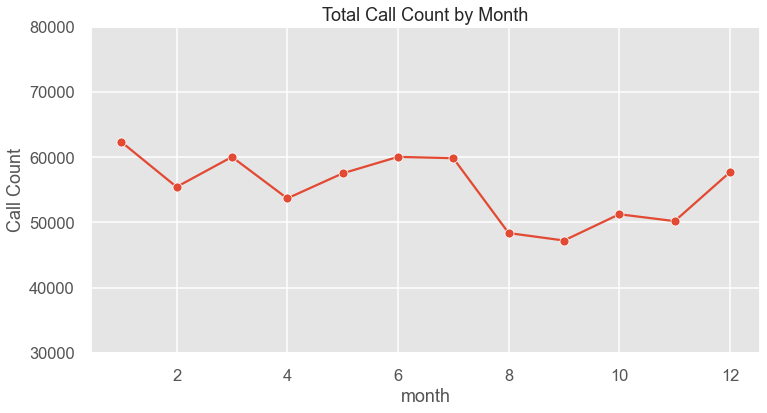

In [31]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=calls_by_month, x='month', y='e',
             marker='o', estimator=sum, ci=None)

plt.ylabel('Call Count')
plt.ylim((30000,80000))
plt.title("Total Call Count by Month")

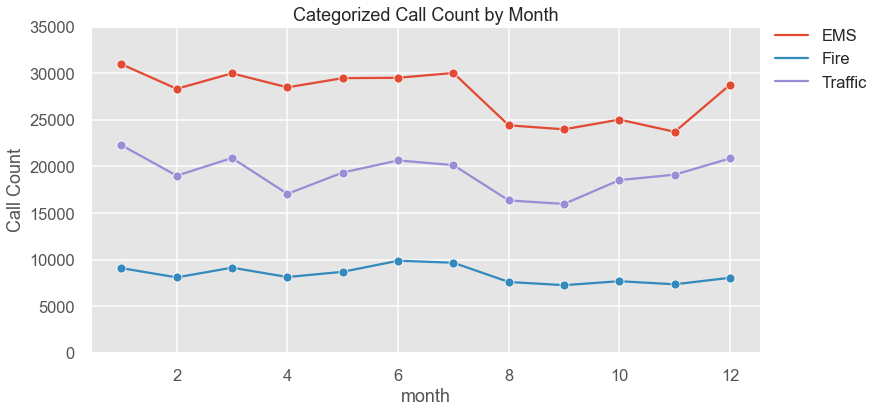

In [32]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=calls_by_month, x='month', y='e',
             hue='reason', marker='o')

plt.ylabel('Call Count')
plt.ylim((0,35000))
plt.title("Categorized Call Count by Month")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.9))

In [33]:
from matplotlib.ticker import MultipleLocator

plt.style.use('seaborn')
sns.set_context('talk', font_scale=0.8)

(40000.0, 70000.0)

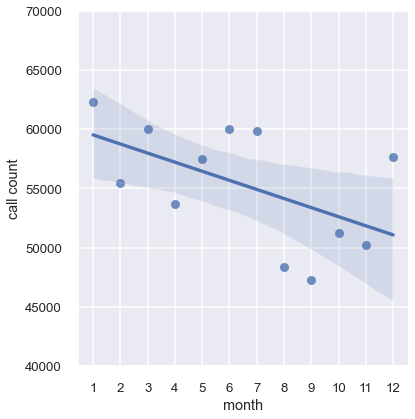

In [34]:
g = sns.lmplot(data=calls_by_month.groupby('month').sum().reset_index(),        # RESET_INDEX
               x='month', y='e', height=6, aspect=1)

g.axes[0][0].xaxis.set_major_locator(MultipleLocator(1))

g.set_ylabels('call count')

plt.ylim((40000, 70000))

### Creating New Column - <code>date</code>

In [35]:
df['date'] = df['timeStamp'].apply(lambda x : x.date())

df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,month,day_of_week,hour,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,Thu,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,Thu,17,2015-12-10


### Analyzing Calls by Date

In [36]:
calls_by_date = df.groupby(['date', 'reason']).count()[['e']]

calls_by_date.head()

e
date       reason      
2015-12-10 EMS       58
           Fire      15
           Traffic   41
2015-12-11 EMS      186
           Fire      68

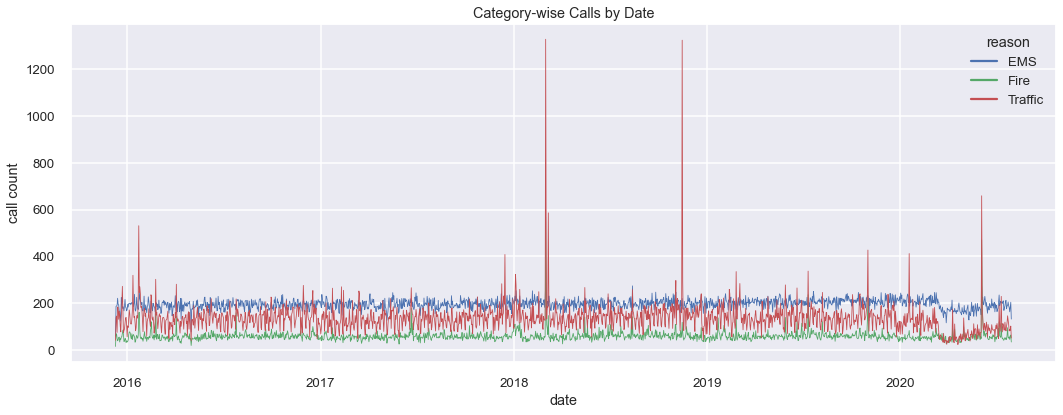

In [37]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=calls_by_date, x='date', y='e', hue='reason', lw=0.8)
plt.title('Category-wise Calls by Date')
plt.ylabel('call count')
plt.tight_layout()

In [38]:
calls_by_date.groupby('date').sum().iplot(kind='line', title='Total Calls')

In [39]:
calls_by_date.unstack('reason').iplot(kind='line', title='Calls by Category')

In [40]:
df[df['reason']=='EMS'].groupby('date').count()['e'].iplot(kind='line', title='EMS Calls')

In [41]:
df[df['reason']=='Traffic'].groupby('date').count()['e'].iplot(kind='line', title='Traffic Calls')

In [42]:
df[df['reason']=='Fire'].groupby('date').count()['e'].iplot(kind='line', title='Fire Calls')

### Analyzing Calls by Hour

In [43]:
# Grouping Data
calls_by_hour = df.groupby(['day_of_week', 'hour']).count().reset_index()

# Creating Matrix from DataFrame using PIVOT
calls_by_hour = calls_by_hour.pivot(index='day_of_week', columns='hour', values='e')

# Re-Ordering Index
calls_by_hour = calls_by_hour.reindex(day_map.values())

calls_by_hour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323


<AxesSubplot:xlabel='hour', ylabel='day_of_week'>

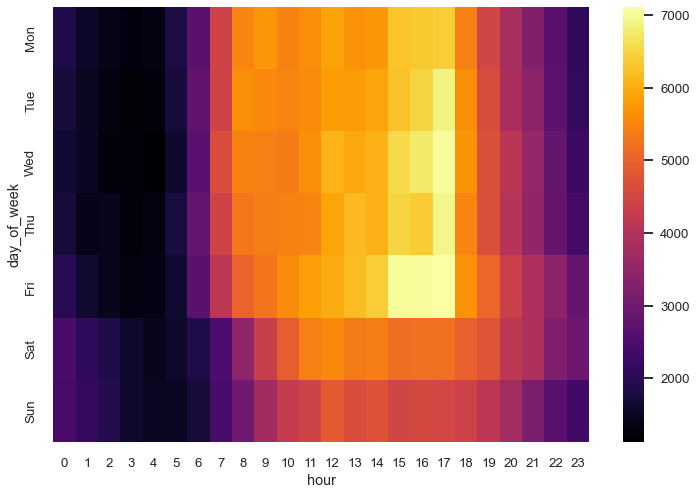

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(calls_by_hour, cmap='inferno')

In [45]:
# Alternate method for Matrix creation - UNSTACK()

by_hour = df.groupby(['day_of_week', 'hour']).count()['e'].unstack('hour')

by_hour = by_hour.reindex(day_map.values())

by_hour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323


<Figure size 864x576 with 0 Axes>

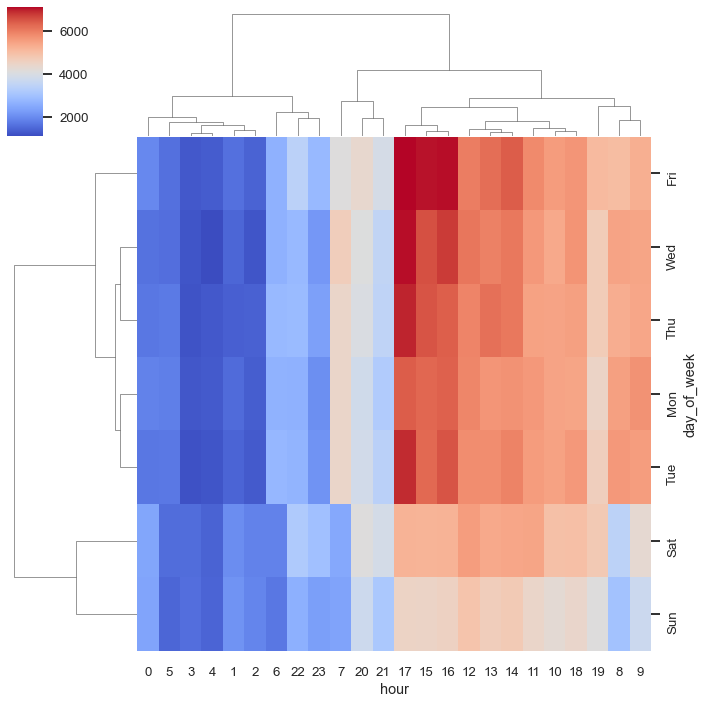

In [46]:
plt.figure(figsize=(12,8))
sns.clustermap(by_hour, cmap='coolwarm')

## Thank You.